In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

In [36]:
df = pd.read_csv('dataset/gym_churn_us.csv')
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Os dados estão completos, sem valores ausentes. A maioria dos clientes possui contratos curtos e baixa permanência na academia, indicando alta rotatividade. A diferença entre a frequência atual e a média histórica pode servir como sinal de alerta precoce para churn.

In [37]:
medias_por_grupo = df.groupby('Churn').mean(numeric_only=True)
medias_que_ficaram = medias_por_grupo.loc[0]
print(medias_que_ficaram)


gender                                 0.510037
Near_Location                          0.873086
Partner                                0.534195
Promo_friends                          0.353522
Phone                                  0.903709
Contract_period                        5.747193
Group_visits                           0.464103
Age                                   29.976523
Avg_additional_charges_total         158.445715
Month_to_end_contract                  5.283089
Lifetime                               4.711807
Avg_class_frequency_total              2.024876
Avg_class_frequency_current_month      2.027882
Name: 0, dtype: float64


Retenção está fortemente associada a contratos mais longos, alta frequência de uso, engajamento com serviços adicionais e conexão com a academia (proximidade ou vínculo com parceiros).

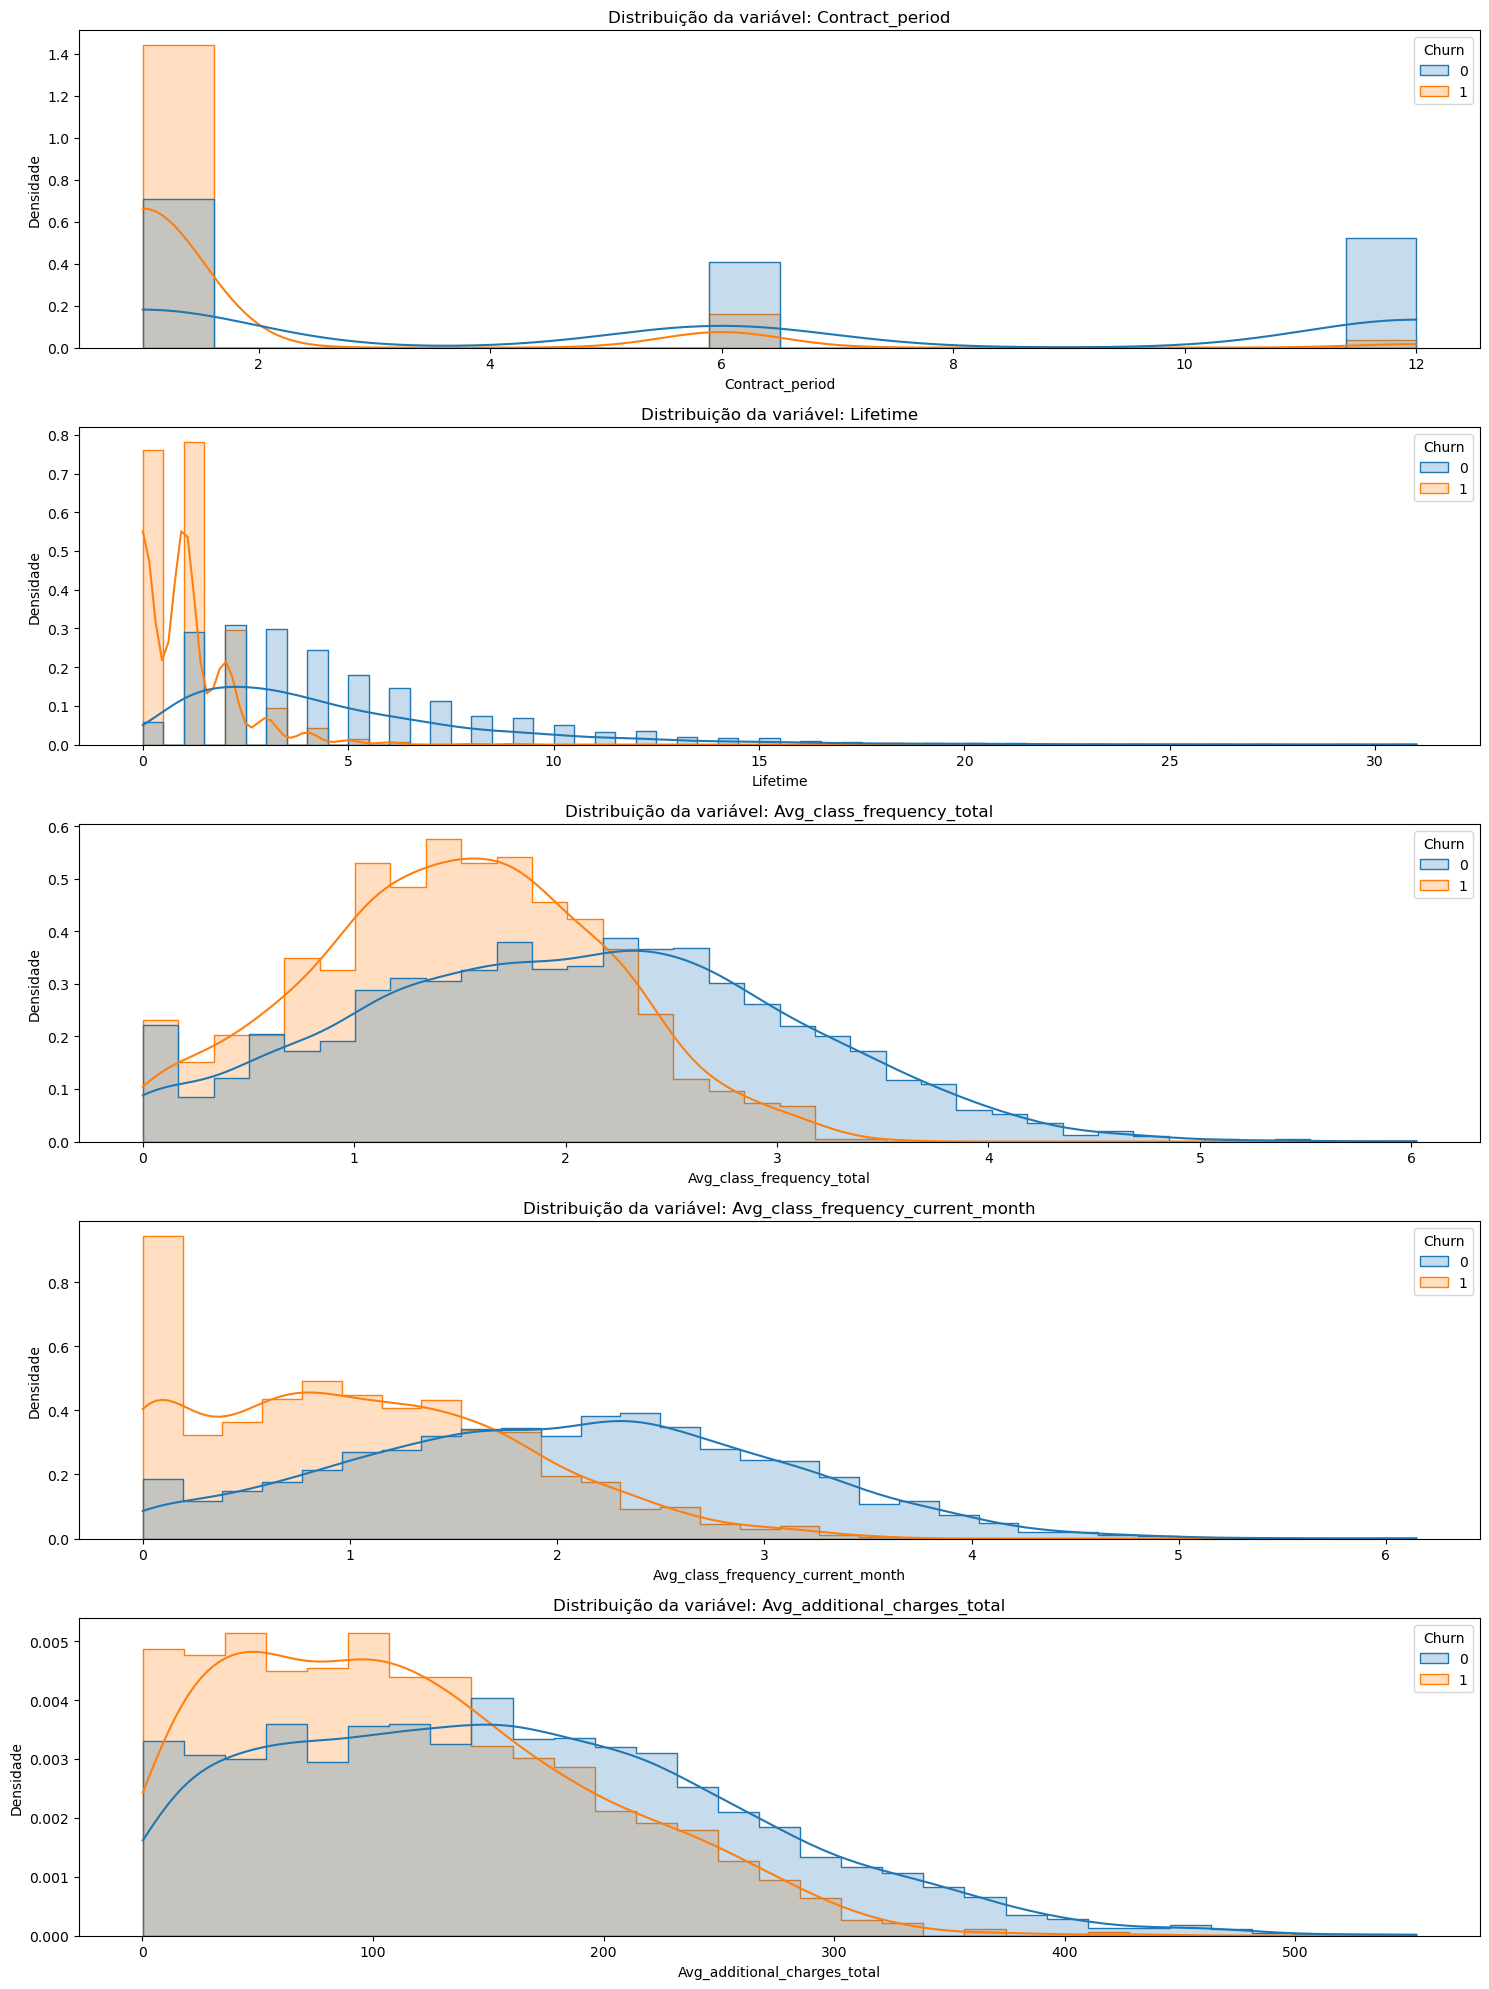

In [38]:
colunas_para_visualizar = [
    'Contract_period', 'Lifetime', 'Avg_class_frequency_total',
    'Avg_class_frequency_current_month', 'Avg_additional_charges_total'
]

# Configuração geral dos gráficos
plt.style.use('default')
plt.figure(figsize=(15, 20))

# Gerar um histograma para cada coluna
for i, coluna in enumerate(colunas_para_visualizar):
    plt.subplot(len(colunas_para_visualizar), 1, i + 1)
    sns.histplot(data=df, x=coluna, hue='Churn', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribuição da variável: {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Densidade')

plt.tight_layout()
plt.show()

1. Contract_period
Churners (saíram) estão concentrados em contratos de 1 mês.

Retidos têm distribuição mais uniforme, com picos em 6 e 12 meses.

📌 Contratos longos reduzem a rotatividade — vínculo contratual é um fator-chave.

2. Lifetime
A maioria dos churners tem lifetime muito baixo (0 a 2 meses).

Clientes que permanecem tendem a ter vida útil muito maior.

📌 Primeiros meses são críticos. Se o cliente não engajar logo, ele sai.

3. Avg_class_frequency_total
Clientes que saíram têm frequência concentrada entre 1 e 2x por semana.

Clientes retidos apresentam curva mais larga, chegando a 4–5x por semana.

📌 Baixa frequência de treinos ao longo do tempo indica alto risco de churn.

4. Avg_class_frequency_current_month
Churners apresentam queda brusca na frequência atual.

Clientes que ficaram mantêm ou até aumentam a frequência.

📌 Queda de uso recente é sinal precoce de abandono iminente.

5. Avg_additional_charges_total
Clientes que saíram quase não consomem serviços adicionais.

Os que ficaram gastam consideravelmente mais.

📌 Serviços extras (café, massagens etc.) indicam maior envolvimento com a academia.

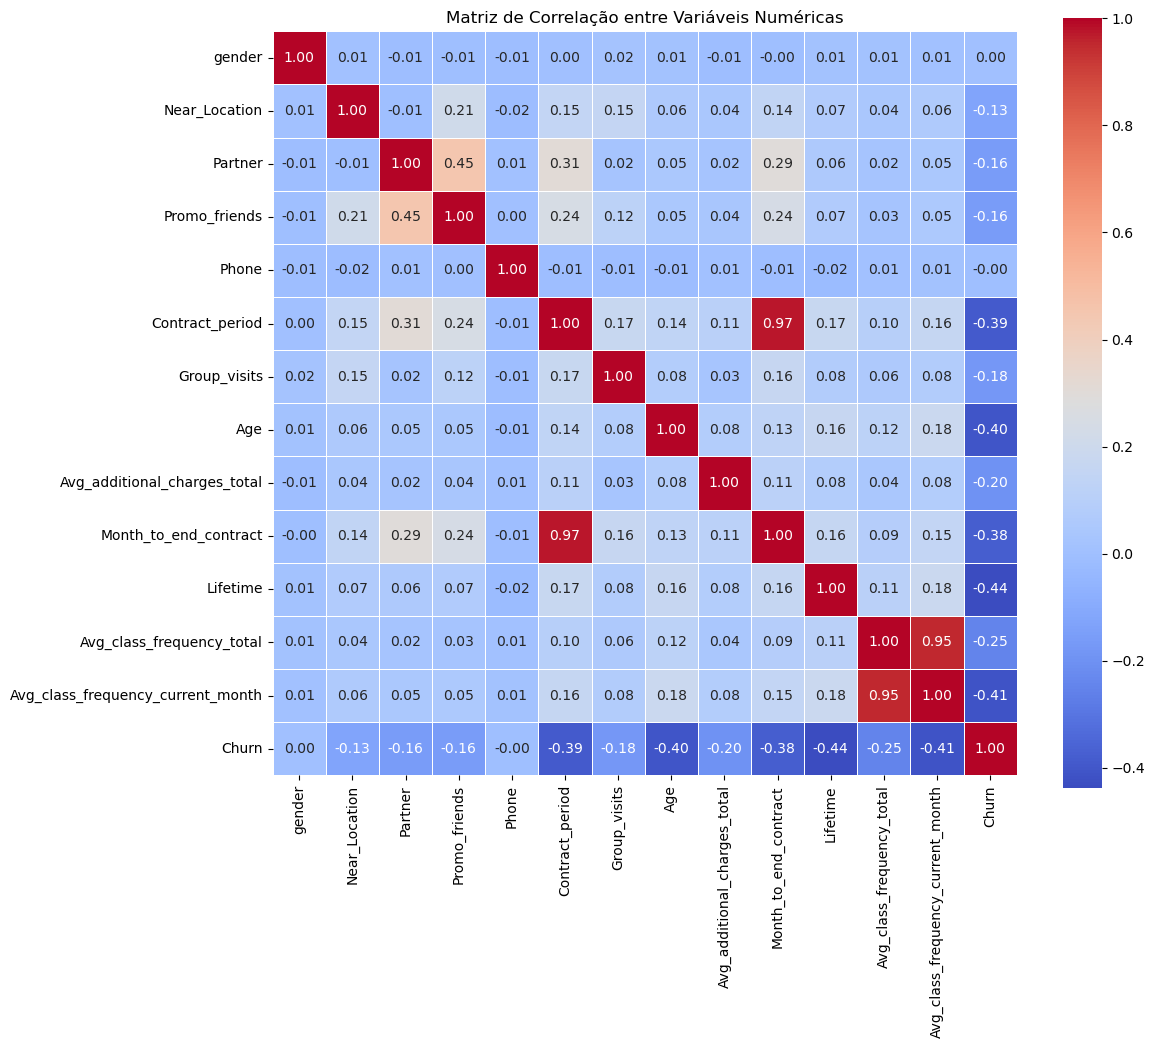

In [39]:
matriz_correlacao = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.show()

| Variável                            | Correlação com Churn | Interpretação Estratégica                                          |
| ----------------------------------- | -------------------- | ------------------------------------------------------------------ |
| `Lifetime`                          | **-0.44**            | Quanto maior o tempo de casa, menor o risco de churn.              |
| `Avg_class_frequency_current_month` | **-0.41**            | Queda de frequência no mês atual é forte sinal de churn iminente.  |
| `Age`                               | **-0.40**            | Clientes mais velhos tendem a permanecer. Jovens abandonam mais.   |
| `Contract_period`                   | **-0.39**            | Contratos longos aumentam retenção.                                |
| `Month_to_end_contract`             | **-0.38**            | Clientes com mais tempo restante de contrato têm menor churn.      |
| `Avg_additional_charges_total`      | **-0.20**            | Quem consome serviços extras está mais engajado.                   |
| `Group_visits`                      | **-0.18**            | Participar de treinos em grupo reduz o churn.                      |
| `Partner` / `Promo_friends`         | **-0.16**            | Parcerias e promoções de entrada contribuem para retenção inicial. |
| `Near_Location`                     | **-0.13**            | Proximidade ajuda, mas não é fator decisivo isolado.               |


In [40]:
X = df.drop('Churn', axis=1)
y = df['Churn']
X_treino, X_validacao, y_treino, y_validacao = train_test_split(
    X, y, test_size=0.25, random_state=42
)

modelo_logistico = LogisticRegression(max_iter=1000, random_state=42)
modelo_logistico.fit(X_treino, y_treino)
y_pred_log = modelo_logistico.predict(X_validacao)
modelo_floresta = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_floresta.fit(X_treino, y_treino)
y_pred_forest = modelo_floresta.predict(X_validacao)

def avaliar_modelo(y_real, y_previsto):
    acuracia = accuracy_score(y_real, y_previsto)
    precisao = precision_score(y_real, y_previsto)
    sensibilidade = recall_score(y_real, y_previsto)
    return acuracia, precisao, sensibilidade

resultados_log = avaliar_modelo(y_validacao, y_pred_log)
resultados_forest = avaliar_modelo(y_validacao, y_pred_forest)

# 6. Exibir resultados
print('--- Regressão Logística ---')
print(f'Acurácia: {resultados_log[0]:.4f}')
print(f'Precisão: {resultados_log[1]:.4f}')
print(f'Sensibilidade (Recall): {resultados_log[2]:.4f}\n')

print('--- Floresta Aleatória ---')
print(f'Acurácia: {resultados_forest[0]:.4f}')
print(f'Precisão: {resultados_forest[1]:.4f}')
print(f'Sensibilidade (Recall): {resultados_forest[2]:.4f}')

--- Regressão Logística ---
Acurácia: 0.9260
Precisão: 0.8841
Sensibilidade (Recall): 0.8142

--- Floresta Aleatória ---
Acurácia: 0.9160
Precisão: 0.8658
Sensibilidade (Recall): 0.7905


Modelo Recomendado: Regressão Logística
Motivo:
Apesar da Random Forest ser mais robusta em geral, neste caso a regressão logística superou em todas as métricas-chave:

Melhor acurácia (menos erros gerais)

Melhor precisão (menos falsos positivos)

Melhor recall (menos falsos negativos — crucial para identificar churners)

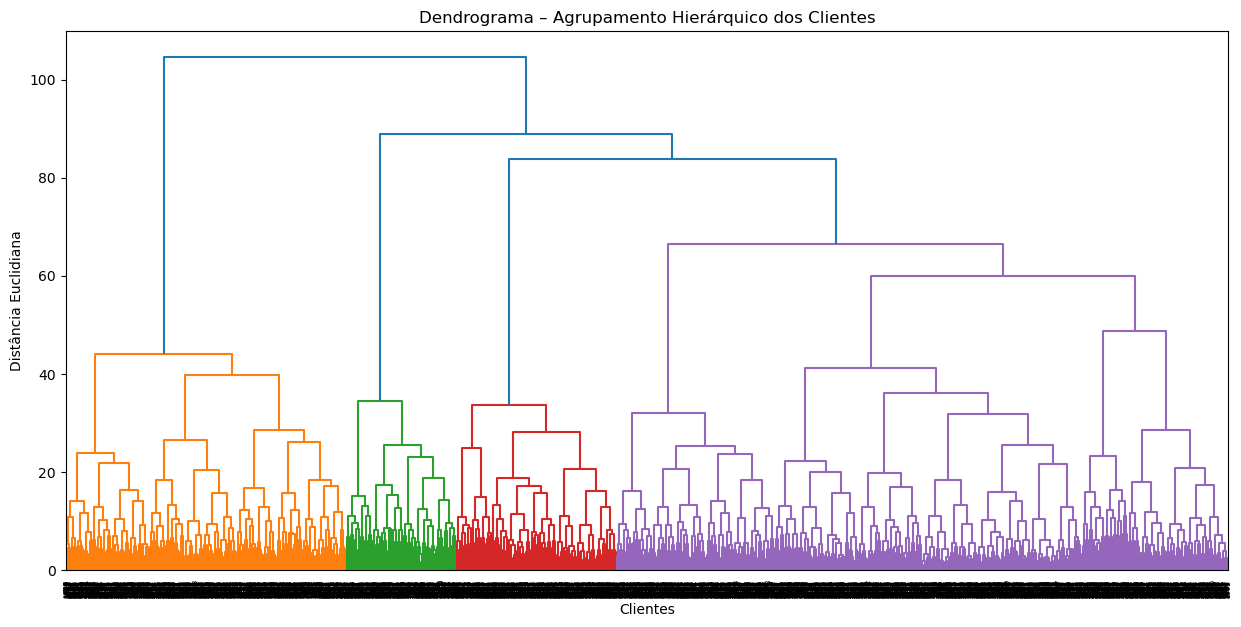

In [41]:
dados_numericos = df.drop(columns=['Churn'])

escalonador = StandardScaler()
dados_padronizados = escalonador.fit_transform(dados_numericos)

matriz_ligacao = linkage(dados_padronizados, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(matriz_ligacao, truncate_mode='level', p=25)  # truncate_mode reduz o tamanho visual
plt.title('Dendrograma – Agrupamento Hierárquico dos Clientes')
plt.xlabel('Clientes')
plt.ylabel('Distância Euclidiana')
plt.show()

Ao observar o dendrograma, é possível notar um corte claro entre 3 e 4 grandes galhos principais, especialmente antes da distância euclidiana de 90. O salto vertical mais evidente ocorre entre 3 e 4 grupos.

Número ideal de agrupamentos: 4 clusters



In [42]:
dados_sem_churn = df.drop(columns=['Churn'])

escalonador = StandardScaler()
dados_padronizados = escalonador.fit_transform(dados_sem_churn)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(dados_padronizados)

df['cluster_kmeans'] = kmeans.labels_

print(df['cluster_kmeans'].value_counts())

cluster_kmeans
0    1283
4     894
2     646
1     633
3     544
Name: count, dtype: int64


In [44]:
medias_por_cluster = df.groupby('cluster_kmeans').mean(numeric_only=True)

medias_por_cluster


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_kmeans,,,,,,,,,,,,,,
0,0.484801,0.698363,0.301637,0.007015,0.899454,1.733437,0.255651,28.074825,127.131782,1.657833,2.089634,1.256531,0.991781,0.587685
1,0.494471,0.947867,0.791469,0.998420,0.906793,2.740916,0.431280,28.903633,139.456908,2.540284,3.529226,1.619489,1.488508,0.285940
2,0.464396,0.913313,0.766254,0.493808,0.925697,10.495356,0.506192,30.091331,164.190347,9.484520,4.693498,2.888801,2.886027,0.013932
3,0.547794,0.937500,0.742647,0.424632,0.863971,11.194853,0.575368,29.720588,167.670439,10.347426,4.818015,1.154578,1.139605,0.042279
4,0.568233,0.878076,0.178971,0.048098,0.914989,2.120805,0.456376,29.993289,155.602830,2.013423,4.844519,2.667290,2.650122,0.105145


| Cluster | % Churn     | Perfil Comportamental                                                                                                       |
| ------- | ----------- | --------------------------------------------------------------------------------------------------------------------------- |
| **0**   | **58,7%** ❌ | Contratos curtos (1.7 meses), baixa frequência, sem promoções, pouca proximidade. Alta evasão.                              |
| **1**   | 28,6% ⚠️    | Clientes com promoções "traga um amigo" (quase 100%), envolvimento mediano, contratos curtos. Alguns retêm.                 |
| **2**   | **1,4%** ✅  | Contratos longos (10 meses), alta frequência, alto lifetime, uso expressivo de serviços. Clientes altamente engajados.      |
| **3**   | 4,2% ✅      | Frequência baixa, mas contratos longos e alta fidelidade. Pode ser grupo com rotina estável e comportamento mais reservado. |
| **4**   | 10,5% ✅     | Alta frequência, gastos extras, mas contrato ainda relativamente curto. Grupo engajado com risco moderado.                  |


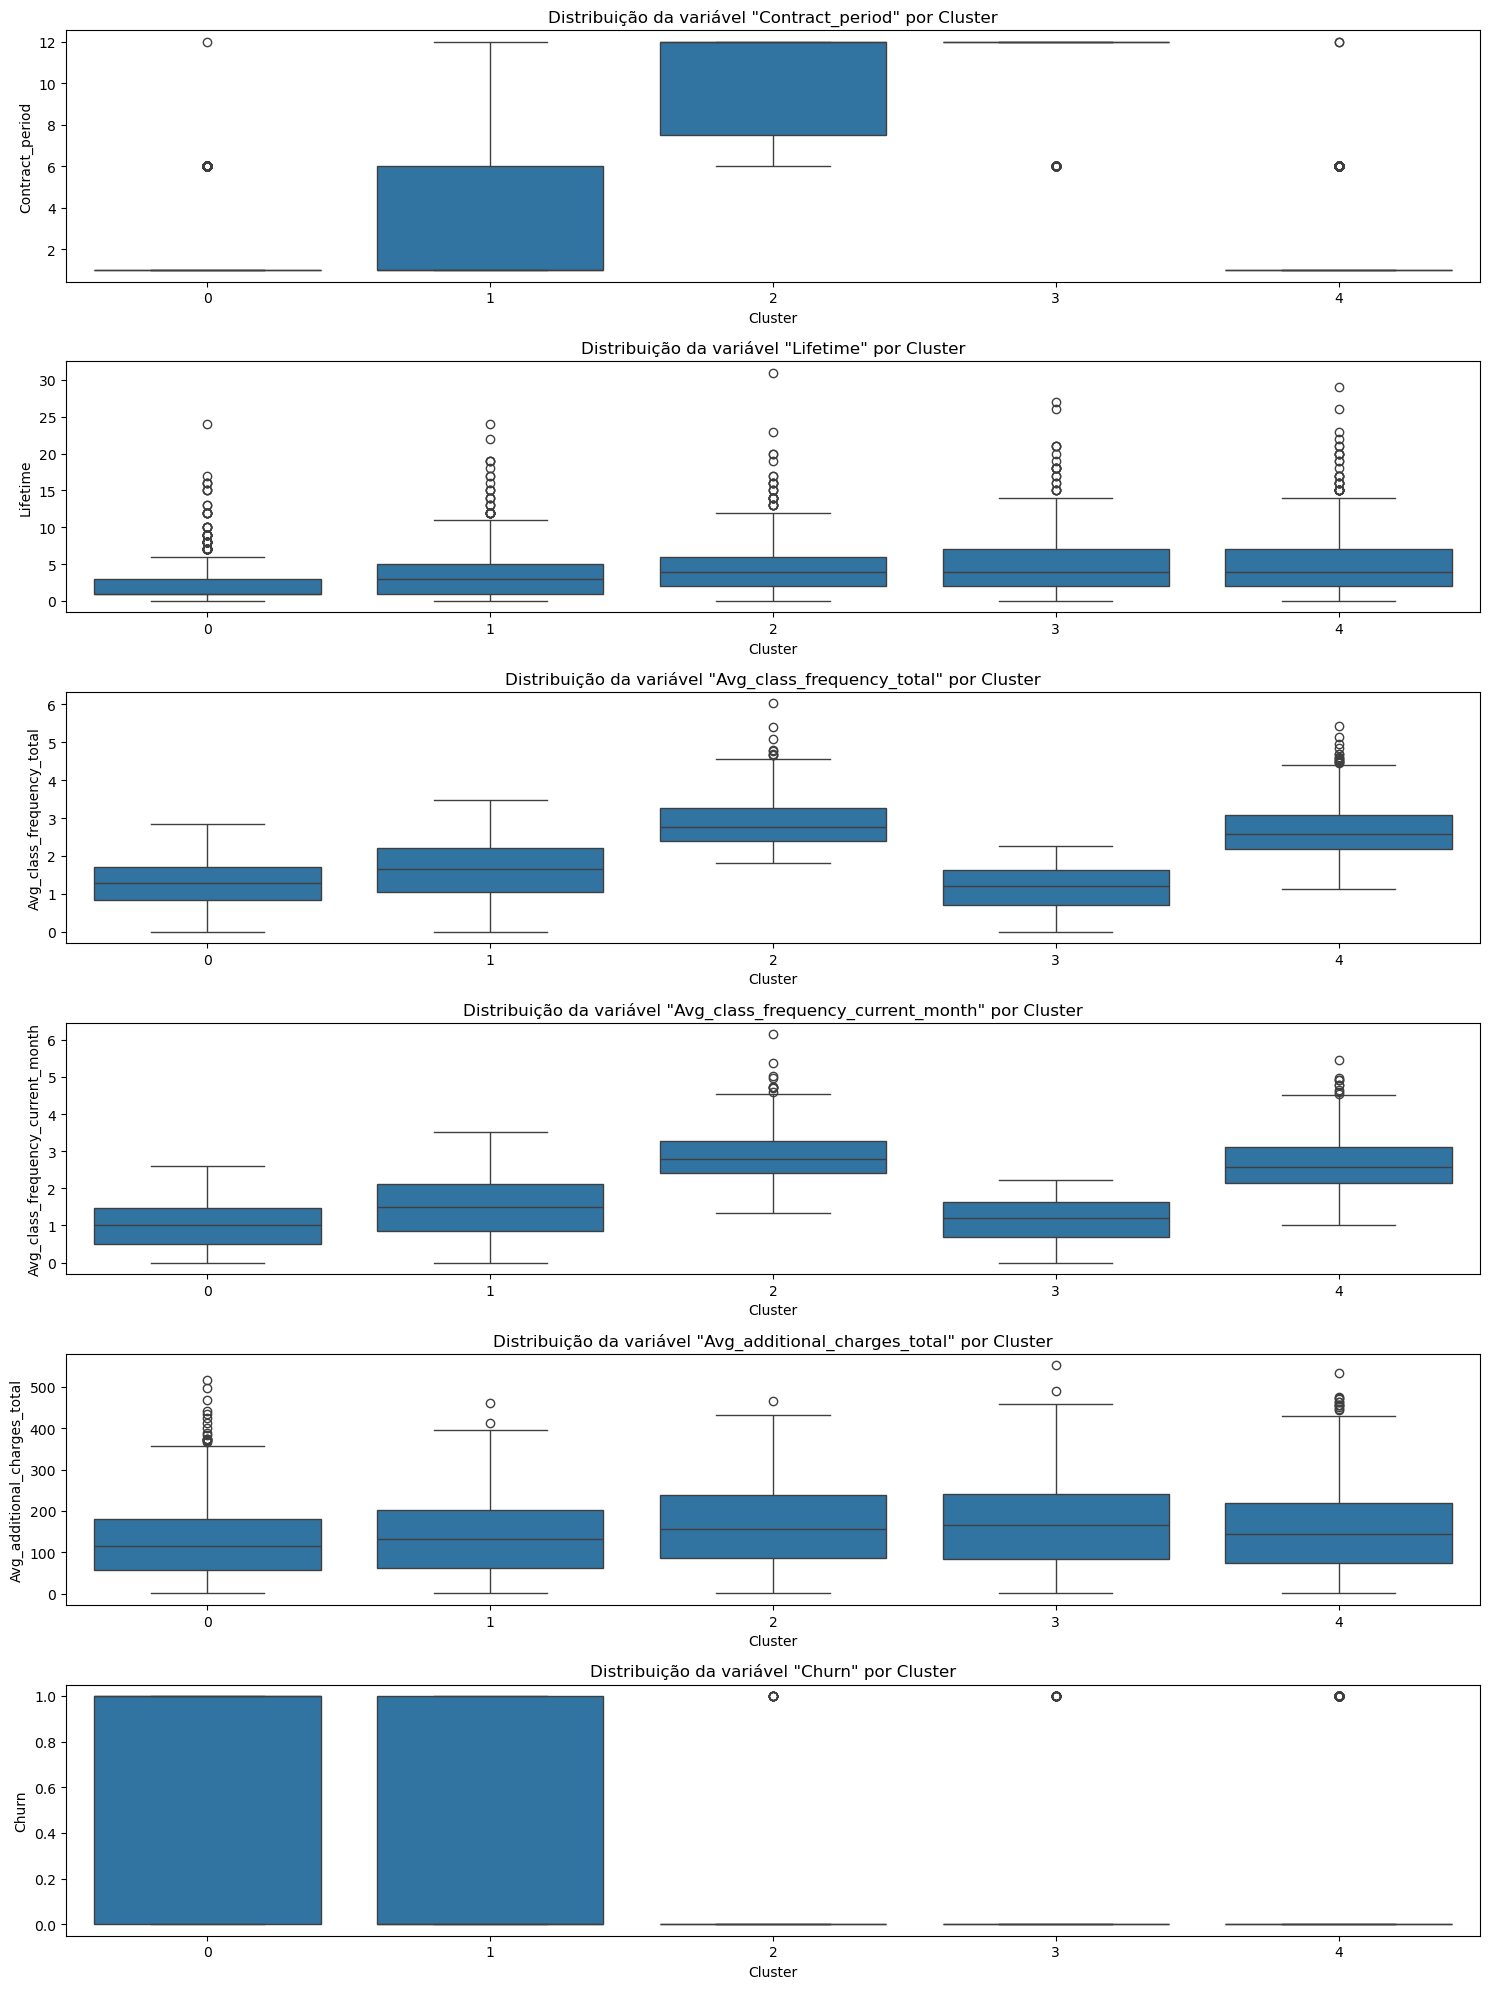

In [45]:
variaveis_para_plotar = [
    'Contract_period', 'Lifetime', 'Avg_class_frequency_total',
    'Avg_class_frequency_current_month', 'Avg_additional_charges_total', 'Churn'
]
plt.figure(figsize=(15, 20))
for i, var in enumerate(variaveis_para_plotar):
    plt.subplot(len(variaveis_para_plotar), 1, i + 1)
    sns.boxplot(data=df, x='cluster_kmeans', y=var)
    plt.title(f'Distribuição da variável "{var}" por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

Contract_period:

- Clusters 2 e 3 têm contratos longos → churn baixíssimo.

- Cluster 0 tem contratos curtos → churn altíssimo.

Lifetime:

- Clusters 2, 3 e 4 têm média de lifetime alta.

- Cluster 0, novamente, com os clientes mais “frescos”.

Frequência (histórica e atual):

- Cluster 2: frequência mais alta → retidos.

- Cluster 3: frequência baixa, mas não abandonam (provável lealdade passiva).

- Cluster 0: frequência abaixo de 1 → maior risco.

Gastos adicionais:

- Clusters 2, 3 e 4 gastam mais → maior engajamento.

- Cluster 0 gasta menos → desinteresse generalizado.

Churn:

- Cluster 0 = grupo crítico (quase 60% churn).

- Clusters 2 e 3 = ultra fidelizados.



Cluster 0 é o alvo primário para ações de retenção: contratos curtos, baixa frequência, nenhum engajamento promocional.

Cluster 2 é seu grupo de “clientes ideais”: longos contratos, presença constante, consumo de extras.

Cluster 1 pode estar vindo por promoção mas não engajando de fato — precisa de nurturing.

Clusters 3 e 4 são estáveis, mas com nuances diferentes (um mais frequente, outro mais “low-profile”).



In [46]:
taxa_churn_por_cluster = df.groupby('cluster_kmeans')['Churn'].mean()

print(taxa_churn_por_cluster)


cluster_kmeans
0    0.587685
1    0.285940
2    0.013932
3    0.042279
4    0.105145
Name: Churn, dtype: float64


| Cluster | Taxa de Churn | Interpretação                                                                                                                    |
| ------- | ------------- | -------------------------------------------------------------------------------------------------------------------------------- |
| **0**   | **58,8%** 🔴  | **Grupo de alto risco**: baixa frequência, contratos curtos, sem vínculo com a academia. Precisam de ações corretivas imediatas. |
| **1**   | **28,6%** 🟠  | **Grupo vulnerável**: vieram por promoção, mas engajamento não sustentou. Precisam de onboarding mais estruturado.               |
| **2**   | **1,4%** ✅    | **Clientes altamente leais**: frequência alta, contratos longos, consumo de serviços. Público ideal.                             |
| **3**   | **4,2%** ✅    | **Leais e discretos**: mesmo com frequência mais baixa, continuam na base. Fidelização passiva.                                  |
| **4**   | **10,5%** 🟢  | **Grupo promissor**: frequência elevada e moderado consumo. Estão no caminho da fidelização.                                     |


Resumo estratégico:

- Cluster 0 = ação imediata → campanhas de reativação, incentivo a planos longos.

- Cluster 1 = retenção preventiva → pós-promoção com gatilhos de engajamento.

- Clusters 2, 3 e 4 = preservar → fidelizar, oferecer upgrades e reconhecer a lealdade.

# Conclusões e Recomendações Estratégicas

✅ 1. Priorize os primeiros 2 meses de experiência
Conclusão: A maioria dos clientes que abandonam está nos primeiros meses e com contratos curtos.

Ação de marketing:

- Ativar um programa de onboarding intensivo nas 4 primeiras semanas com: check-in automático, mensagens de boas-vindas, acompanhamento personalizado.

- Bonificação por frequência nas primeiras 8 semanas (ex: "5 treinos na semana = 1 smoothie grátis").

✅ 2. Venda contratos longos com valor agregado
Conclusão: Contratos acima de 6 meses reduzem drasticamente o churn.

Ação de marketing:

- Criar campanhas com desconto progressivo por tempo (ex: “12 meses = 2 meses grátis + avaliação física premium”).

- Estimular o upsell no momento do contrato, com benefícios visíveis: aulas exclusivas, locker VIP, personal 1x/mês.

✅ 3. Frequência é o melhor preditor de retenção
Conclusão: A queda na frequência é o primeiro sinal claro de evasão.

Ação de marketing:

- Implementar alertas internos de pré-churn com base em frequência semanal.

- Automatizar mensagens de reengajamento (“Saudades de você! Venha treinar e ganhe 1 café na nossa loja.”).

✅ 4. Use o comportamento dos clientes leais como benchmark
Conclusão: Clusters leais têm comportamento claro: alto lifetime, uso de serviços adicionais, frequência constante.

Ação de marketing:

- Criar um programa “Fitness Master” para clientes do cluster 2 com acesso antecipado a eventos, brindes e plano de fidelidade.

- Aplicar lookalike behavior para detectar novos clientes com perfil semelhante e acompanhá-los de perto.

